In [1]:
import pandas as pd
from tools import language as lang, outliers

cols = ["pid", "product_name", "product_category_tree", "description", "brand"]
df = pd.read_csv("data/flipkart_sample.csv", usecols=cols)
display(df.head())
df.shape

,product_name,product_category_tree,pid,description,brand
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,Key Features of Alisha Solid Women's Cycling S...,Alisha
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,Key Features of AW Bellies Sandals Wedges Heel...,AW
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,Key Features of Alisha Solid Women's Cycling S...,Alisha
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,Specifications of Sicons All Purpose Arnica Do...,Sicons


(20000, 5)

In [2]:
df.rename({"pid": "sku", "product_category_tree": "category", "product_name": "title"}, axis=1, inplace=True)
df.head()

,title,category,sku,description,brand
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,Key Features of Alisha Solid Women's Cycling S...,Alisha
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,Key Features of AW Bellies Sandals Wedges Heel...,AW
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,Key Features of Alisha Solid Women's Cycling S...,Alisha
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,Specifications of Sicons All Purpose Arnica Do...,Sicons


In [3]:
df.drop_duplicates(subset=["sku"], inplace=True)
df.drop_duplicates(subset=["title", "brand"], inplace=True)
df.drop_duplicates(subset=["description"], inplace=True)

display(df.head())
df.shape

,title,category,sku,description,brand
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,Key Features of Alisha Solid Women's Cycling S...,Alisha
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,Key Features of AW Bellies Sandals Wedges Heel...,AW
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,Specifications of Sicons All Purpose Arnica Do...,Sicons
5,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",PWTEB7H2E4KCYUE3,Key Features of Eternal Gandhi Super Series Cr...,Eternal Gandhi


(13021, 5)

In [4]:
df.replace(r"(?i)none", pd.NA, regex=True, inplace=True)
df.dropna(subset = ["description", "sku"], inplace=True)
df.fillna("", inplace=True)
display(df.head())
df.shape

,title,category,sku,description,brand
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,Key Features of Alisha Solid Women's Cycling S...,Alisha
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,Key Features of AW Bellies Sandals Wedges Heel...,AW
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,Specifications of Sicons All Purpose Arnica Do...,Sicons
5,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",PWTEB7H2E4KCYUE3,Key Features of Eternal Gandhi Super Series Cr...,Eternal Gandhi


(12995, 5)

In [5]:
df["main_cat"] = df["category"].str.extract(r"\[\"([\w\s]+) >>").squeeze()
df.dropna(subset=["main_cat"], inplace=True)
df["main_cat"].value_counts()

Clothing                    3361
Jewellery                   1943
Automotive                   986
Footwear                     836
Beauty and Personal Care     659
Computers                    568
Watches                      530
Home Furnishing              401
Baby Care                    213
Furniture                    143
Home Improvement              80
Gaming                        34
Home Entertainment            19
Sunglasses                    17
Pet Supplies                  17
eBooks                        15
Eyewear                        5
Household Supplies             3
Wearable Smart Devices         2
Name: main_cat, dtype: int64

In [6]:
df["n_char"] = df["title"].str.len() + df["category"].str.len() + df["description"].str.len()
df.head()

,title,category,sku,description,brand,main_cat,n_char
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing,573
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,Furniture,4583
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,Key Features of AW Bellies Sandals Wedges Heel...,AW,Footwear,720
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,Specifications of Sicons All Purpose Arnica Do...,Sicons,Pet Supplies,394
8,"dilli bazaaar Bellies, Corporate Casuals, Casuals","[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH3DZBFR88SCK,"Key Features of dilli bazaaar Bellies, Corpora...",dilli bazaaar,Footwear,576


<AxesSubplot:ylabel='Frequency'>

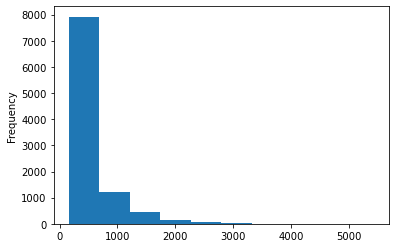

In [7]:
df["n_char"].plot.hist()

             n_trimmed  pct_trimmed
title                0            0
category             0            0
sku                  0            0
description          0            0
brand                0            0
main_cat             0            0
n_char           4,924           50
total_obs        4,924           50


<AxesSubplot:ylabel='Frequency'>

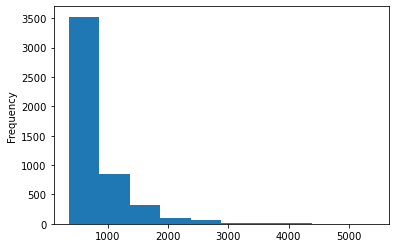

In [8]:
df = outliers.quantile_trim(df, lower=.5, subset=["n_char"])
df["n_char"].plot.hist()

In [9]:
df["lang"] = lang.detect_lang(df["description"], n_jobs=-1, seed=30)
df["lang"].value_counts()

detect_lang:   0%|          | 0/4908 [00:00<?, ?it/s]

en    4908
Name: lang, dtype: int64

In [10]:
df = df.loc[df.lang == "en"]
df.drop(columns="lang")
df.shape

(4908, 8)

In [13]:
keep = df["main_cat"].value_counts().loc[lambda x: x > 10].index
df = df.loc[df.main_cat.isin(keep)]
display(df["main_cat"].unique())
df.shape

array(['Automotive', 'Baby Care', 'Beauty and Personal Care', 'Clothing',
       'Computers', 'Footwear', 'Furniture', 'Gaming',
       'Home Entertainment', 'Home Furnishing', 'Home Improvement',
       'Jewellery', 'Pet Supplies', 'Sunglasses', 'Watches', 'eBooks'],
      dtype=object)

(4899, 8)

In [12]:
df = df.sort_values("main_cat").reset_index(drop=True)
df.to_parquet("data/flipkart.parquet", engine="pyarrow")